In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/Users/willchenwenjun/Desktop/Capstone/clustered_sample.csv')

# Display the first few rows to check the data
data.head()


,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,SSRETINC,ASSET,DEBT,NETWORTH,...,PERCENTLIQUIDASSETS,PERCENTILLIQUIDASSETS,PERCENTSTOCKS,PERCENTBOND,PERCENTFINOTHERS,PERCENTFIXEDINCOME,PERCENTVARIABLEINCOME,PERCENTOTHERINCOME,COMMITMENTAMOUNT,Cluster
0,619630.541086,126607.201904,-6851.683868,16414.251353,484086.360227,0.000000,0.0,1723051.2,351390.0,1371661.2,...,0.533919,0.466081,0.400045,0.000000,0.066036,0.204327,0.796683,-0.001010,1.506898e+06,5
1,640483.491986,253214.403808,0.000000,0.000000,297899.298598,89369.789579,0.0,1033500.0,663507.0,369993.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.395349,0.465116,0.139535,3.775701e+05,5
2,312794.263533,297899.298598,0.000000,74.474825,14894.964929,0.000000,0.0,830520.6,286624.0,543896.6,...,0.267475,0.732525,0.000000,0.075101,0.657423,0.952381,0.047857,-0.000238,6.370112e+05,0
3,350031.675856,342584.193388,0.000000,0.000000,7596.432114,0.000000,0.0,1366976.0,542932.0,824044.0,...,0.009434,0.990566,0.707547,0.000000,0.283019,0.978723,0.021702,-0.000426,9.700267e+05,2
4,403653.549601,402164.053100,0.000000,14.894965,0.000000,0.000000,0.0,1227522.4,201188.0,1026334.4,...,0.410815,0.589185,0.042135,0.000000,0.547051,0.996310,0.000037,0.003653,3.794484e+05,0


In [2]:
# Count the number of occurrences for each cluster
cluster_counts = data['Cluster'].value_counts()

# Display the counts
print(cluster_counts)


0    231
1     80
2     55
5     47
3     34
8      3
6      3
4      2
7      2
Name: Cluster, dtype: int64


In [ ]:
# Filter data for clusters 0, 1, 2, 5, and 3
filtered_data = data[data['Cluster'].isin([0, 1, 2, 5, 3])]




In [4]:
# Calculate summary statistics for selected clusters
summary_stats = filtered_data.groupby('Cluster').agg(['mean', 'median', 'std'])

# Display the summary statistics
summary_stats[[]]


/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_1030/2555399305.py:2: FutureWarning: ['Age Group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats = filtered_data.groupby('Cluster').agg(['mean', 'median', 'std'])


Cluster
0
1
2
3
5


/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_1030/3171172624.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PCA1'] = pca_data[:, 0]
/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_1030/3171172624.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PCA2'] = pca_data[:, 1]


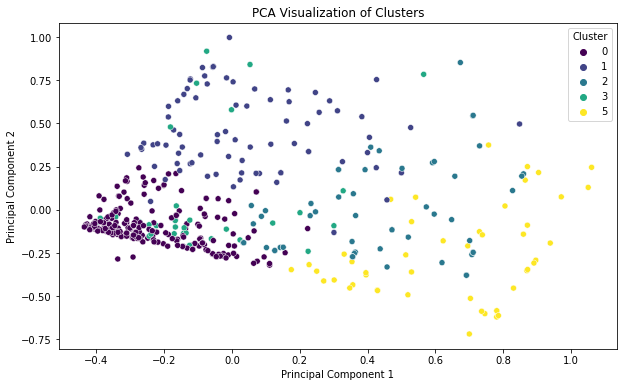

In [5]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for PCA
features = [
    'PERCENTLIQUIDASSETS', 'PERCENTSTOCKS', 'PERCENTBOND', 
    'PERCENTFINOTHERS', 'PERCENTFIXEDINCOME', 'PERCENTVARIABLEINCOME', 
    'INCOME', 'ASSET', 'DEBT', 'NETWORTH'
]

# Filter the data for selected clusters
filtered_data = data[data['Cluster'].isin([0, 1, 2, 5, 3])]

# Standardize the data for PCA
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_data[features])

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add the PCA results to the filtered_data DataFrame for plotting
filtered_data['PCA1'] = pca_data[:, 0]
filtered_data['PCA2'] = pca_data[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=filtered_data, palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




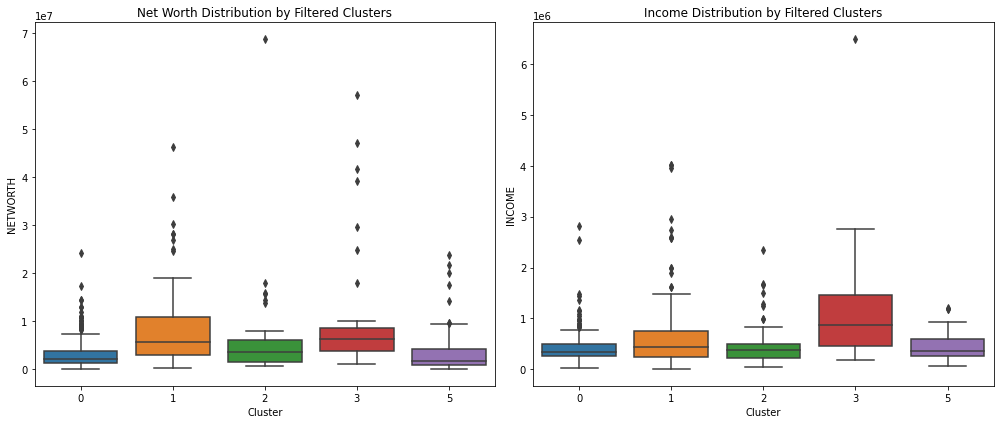

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the selected clusters
filtered_data = data[data['Cluster'].isin([0, 1, 2, 5, 3])]

# Set up the plotting area
plt.figure(figsize=(14, 6))

# Box plot for Net Worth by Cluster (filtered)
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='NETWORTH', data=filtered_data)
plt.title('Net Worth Distribution by Filtered Clusters')

# Box plot for Income by Cluster (filtered)
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='INCOME', data=filtered_data)
plt.title('Income Distribution by Filtered Clusters')

plt.tight_layout()
plt.show()



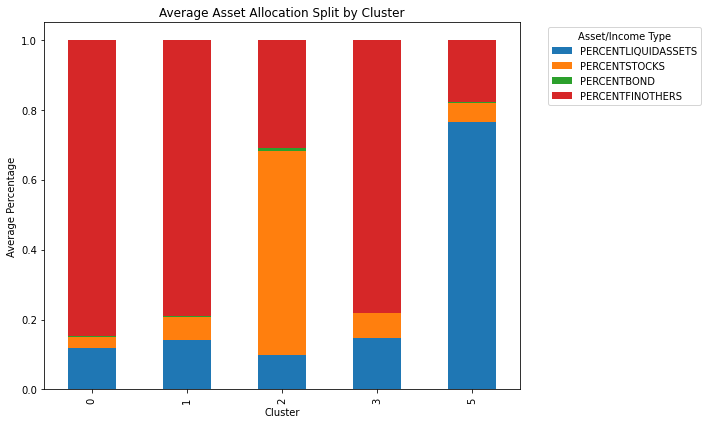

In [7]:
import matplotlib.pyplot as plt

# Calculate the mean asset allocation, including fixed and variable income, for each cluster
asset_split = filtered_data.groupby('Cluster')[[
    'PERCENTLIQUIDASSETS', 'PERCENTSTOCKS', 'PERCENTBOND', 
    'PERCENTFINOTHERS', 
]].mean()

# Plot a stacked bar chart for asset allocation by cluster
asset_split.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Average Asset Allocation Split by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Percentage')
plt.legend(title='Asset/Income Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


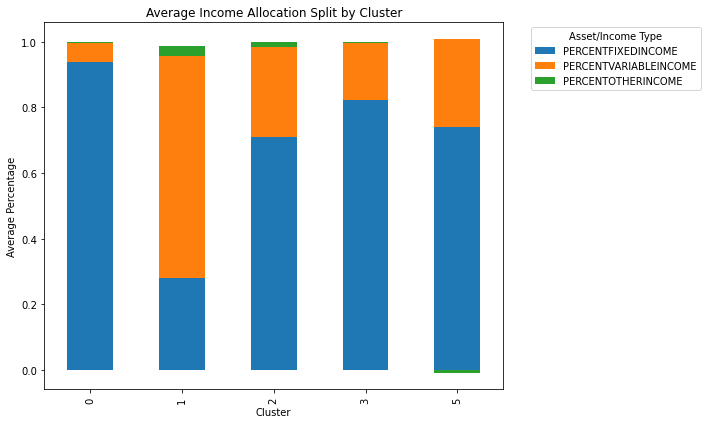

In [10]:
import matplotlib.pyplot as plt

# Calculate the mean asset allocation, including fixed and variable income, for each cluster
filtered_data.loc[383,'PERCENTOTHERINCOME'] = 0
asset_split = filtered_data.groupby('Cluster')[[
    'PERCENTFIXEDINCOME', 'PERCENTVARIABLEINCOME','PERCENTOTHERINCOME'
]].mean()

# Plot a stacked bar chart for asset allocation by cluster
asset_split.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Average Income Allocation Split by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Percentage')
plt.legend(title='Asset/Income Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

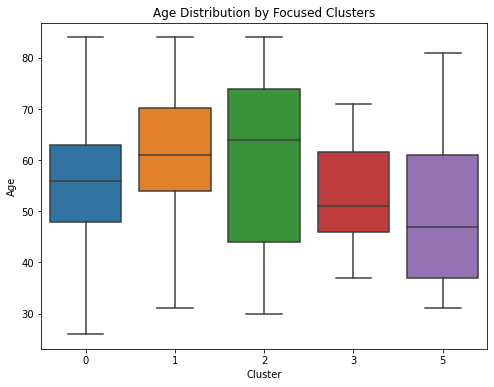

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the selected clusters
filtered_data = data[data['Cluster'].isin([0, 1, 2, 5, 3])]

# Box plot for Age by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='AGE', data=filtered_data)
plt.title('Age Distribution by Focused Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


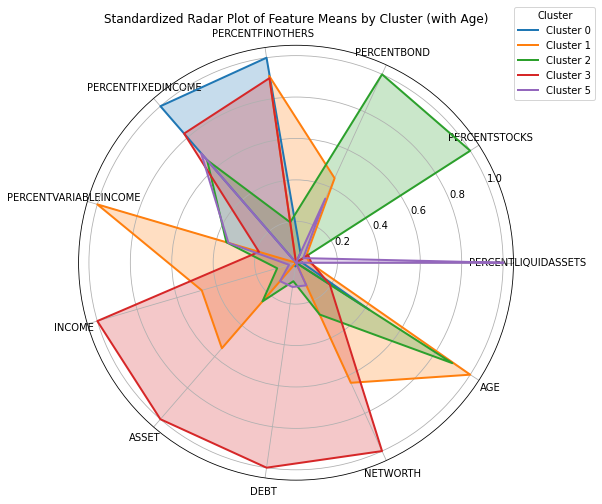

In [14]:
import numpy as np
# Filter the data for the specified clusters
focused_clusters = data[data['Cluster'].isin([0, 1, 2, 5, 3])]

# Define the relevant features including 'AGE'
features_with_age = [
    'PERCENTLIQUIDASSETS', 'PERCENTSTOCKS', 'PERCENTBOND', 
    'PERCENTFINOTHERS', 'PERCENTFIXEDINCOME', 'PERCENTVARIABLEINCOME', 
    'INCOME', 'ASSET', 'DEBT', 'NETWORTH', 'AGE'
]

# Calculate the mean of each feature by cluster
focused_cluster_means = focused_clusters.groupby('Cluster')[features_with_age].mean()

# Standardize the data to a 0-1 range
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(focused_cluster_means)

# Compute angles for radar plot
num_vars = len(features_with_age)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop for radar plot


# Set up the radar plot with standardized data
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster with standardized values
for i, cluster in enumerate(focused_cluster_means.index):
    values = standardized_data[i].tolist()
    values += values[:1]  # Complete the loop for each cluster
    
    ax.plot(angles, values, label=f'Cluster {cluster}', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Add feature labels to each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features_with_age)

# Display legend and title
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Standardized Radar Plot of Feature Means by Cluster (with Age)')
plt.show()


In [41]:
df = pd.read_csv('/Users/willchenwenjun/Desktop/Capstone/Sample Data.csv')

In [45]:
df.loc[:,'CLUSTER'] = data.Cluster

df['FIXEDINCOME'] = df['PERCENTFIXEDINCOME'] * df['INCOME']
df['VARIABLEINCOME'] = df['PERCENTVARIABLEINCOME'] * df['INCOME']
df['OTHERINCOME'] = df['PERCENTOTHERINCOME'] * df['INCOME']

df['NUMBERSOURCEOFFUNDS'] = (df['WAGEINC'] > 0).astype(int) + (df['BUSSEFARMINC'] > 0).astype(int) + (df['INTDIVINC'] > 0).astype(int) + (df['KGINC'] > 0).astype(int) + (df['TRANSFOTHINC'] > 0).astype(int) + (df['SSRETINC'] > 0).astype(int)

In [46]:
 # Filter the DataFrame for the relevant clusters
filtered_df = df[df['CLUSTER'].isin([0, 1, 2, 3, 5])].copy()

In [47]:
concise_df = filtered_df.drop(columns=[
    'WGT', 'Age Group',
    'WAGEINC', 'BUSSEFARMINC', 'INTDIVINC', 'KGINC', 'TRANSFOTHINC', 'SSRETINC',
    'ASSET', 'DEBT', 'MRTHEL', 'FIN', 'ODEBT',
    'BOND', 'STOCKS', 'IRAKH', 'OTHMA', 'NETHOUSE', 'NETFIN', 'NETHOUSECLIPPED', 'NETHOUSEDIFF', 'NETWORTHADJUSTED',
    'PERCENTLIQUIDASSETS', 'PERCENTILLIQUIDASSETS', 'PERCENTSTOCKS', 'PERCENTBOND', 'PERCENTFINOTHERS',
    'PERCENTFIXEDINCOME', 'PERCENTVARIABLEINCOME', 'PERCENTOTHERINCOME',
])
concise_df = concise_df.rename(columns={
    'NETWORTH': 'PERSONALASSETS',
    'HOUSES': 'RESIDENCEVALUE',
    'NFIN': 'FINANCIALASSETS',
    'LIQ': 'LIQUIDASSETS',
    'isIncomeQualified': 'INCOMEQUALIFIED',
    'isPersonalQualified': 'PERSONALQUALIFIED',
    'isFinancialQualified': 'FINANCIALQUALIFIED',
})
concise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 456
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCOME               447 non-null    float64
 1   PERSONALASSETS       447 non-null    float64
 2   RESIDENCEVALUE       447 non-null    float64
 3   FINANCIALASSETS      447 non-null    float64
 4   LIQUIDASSETS         447 non-null    float64
 5   AGE                  447 non-null    int64  
 6   PERSONALQUALIFIED    447 non-null    bool   
 7   INCOMEQUALIFIED      447 non-null    bool   
 8   FINANCIALQUALIFIED   447 non-null    bool   
 9   COMMITMENTAMOUNT     447 non-null    float64
 10  CLUSTER              447 non-null    int64  
 11  FIXEDINCOME          446 non-null    float64
 12  VARIABLEINCOME       446 non-null    float64
 13  OTHERINCOME          446 non-null    float64
 14  NUMBERSOURCEOFFUNDS  447 non-null    int64  
dtypes: bool(3), float64(9), int64(3)
memory 

In [48]:
chance_of_critical_illness = 0.225

concise_df['HASCRITICALILLNESS'] = np.random.rand(len(concise_df)) < chance_of_critical_illness

In [49]:
age_df = pd.read_csv('/Users/willchenwenjun/Desktop/Capstone/Singapore Residents Age Sex.csv')
# Filter the age_df to get the number of people aged 50 and above in 2024
age_50_and_above_2024 = age_df[age_df['Data Series'].str.contains('50 Year|51 Year|52 Year|53 Year|54 Year|55 Year|56 Year|57 Year|58 Year|59 Year|60 Year|61 Year|62 Year|63 Year|64 Year|65 Year|66 Year|67 Year|68 Year|69 Year|70 Year|71 Year|72 Year|73 Year|74 Year|75 Year|76 Year|77 Year|78 Year|79 Year|80 Year|81 Year|82 Year|83 Year|84 Year|85 Year|86 Year|87 Year|88 Year|89 Year')]
number_of_people_50_and_above_2024 = int(age_50_and_above_2024['2024 '].sum())
number_of_people_50_and_above_2024_with_lpa = 233000
percent_of_people_50_and_above_2024_with_lpa = number_of_people_50_and_above_2024_with_lpa / number_of_people_50_and_above_2024
percent_of_people_50_and_above_2024_with_lpa
concise_df['HASLPA'] = np.random.rand(len(concise_df)) < percent_of_people_50_and_above_2024_with_lpa

In [51]:
concise_df_ordered = concise_df[[
    'INCOME', 'FIXEDINCOME', 'VARIABLEINCOME', 'OTHERINCOME',
    'PERSONALASSETS', 'RESIDENCEVALUE', 'LIQUIDASSETS',
    'FINANCIALASSETS',
    'AGE', 'HASLPA', 'HASCRITICALILLNESS', 'NUMBERSOURCEOFFUNDS',
    'COMMITMENTAMOUNT',
    'INCOMEQUALIFIED', 'PERSONALQUALIFIED', 'FINANCIALQUALIFIED',
    'CLUSTER'
]]

In [59]:
class Investor:
    INCOME: float
    FIXEDINCOME: float
    VARIABLEINCOME: float
    OTHERINCOME: float
    PERSONALASSETS: float
    RESIDENCEVALUE: float
    LIQUIDASSETS: float
    FINANCIALASSETS: float
    AGE: int
    HASLPA: bool
    HASCRITICALILLNESS: bool
    NUMBERSOURCEOFFUNDS: int
    COMMITMENTAMOUNT: float
    INCOMEQUALIFIED: bool
    PERSONALQUALIFIED: bool
    FINANCIALQUALIFIED: bool
    CLUSTER: int
    

In [60]:
def red_flag_algorithm_based_on_qualifier(investor: Investor):
    num_red_flags = 0

    if investor.COMMITMENTAMOUNT == 0:
        raise Exception('Commitment Amount cannot be zero')


    # income qualifier
    # if investor.INCOMEQUALIFIED:
    if investor.FIXEDINCOME:
        if investor.VARIABLEINCOME:
            if (investor.FIXEDINCOME + investor.VARIABLEINCOME) / investor.COMMITMENTAMOUNT < 2:
                num_red_flags += 1

    else:
        if investor.FIXEDINCOME / investor.COMMITMENTAMOUNT < 1:
            num_red_flags += 2


    # personal asset qualifier
    # elif investor.PERSONALQUALIFIED:
    if investor.INCOME:
        if investor.LIQUIDASSETS:
            income_liquid_assets_to_ca_ratio = (investor.LIQUIDASSETS + investor.INCOME) / investor.COMMITMENTAMOUNT

            if income_liquid_assets_to_ca_ratio < 1:
                num_red_flags += 3
            elif income_liquid_assets_to_ca_ratio < 2:
                num_red_flags += 2

        else:
            if investor.INCOME / investor.COMMITMENTAMOUNT < 2:
                num_red_flags += 1


    # financial asset qualifier
    # elif investor.FINANCIALQUALIFIED:
    if investor.INCOME:
        if investor.FINANCIALASSETS:
            income_financial_assets_to_ca_ratio = (investor.FINANCIALASSETS + investor.INCOME) / investor.COMMITMENTAMOUNT

            if income_financial_assets_to_ca_ratio < 1:
                num_red_flags += 3
            elif income_financial_assets_to_ca_ratio < 2:
                num_red_flags += 2

        else:
            if investor.INCOME / investor.COMMITMENTAMOUNT < 2:
                num_red_flags += 1


    qualifier_red_flags = num_red_flags


    # demographics
    if investor.AGE > 65:
        if investor.AGE > 75:
            if investor.HASLPA:
                num_red_flags += 1
            else:
                num_red_flags += 2
        
        if investor.INCOME / investor.COMMITMENTAMOUNT < 2:
            num_red_flags += 1

    if investor.HASCRITICALILLNESS:
        num_red_flags += 1

    if investor.NUMBERSOURCEOFFUNDS < 3:
        num_red_flags += 1


    demographic_red_flags = num_red_flags - qualifier_red_flags

    return num_red_flags, qualifier_red_flags, demographic_red_flags


In [62]:


# Initialize columns for red flags
concise_df_ordered['REDFLAGS'] = 0
concise_df_ordered['QUALIFIER_REDFLAGS'] = 0
concise_df_ordered['DEMOGRAPHIC_REDFLAGS'] = 0

# Calculate red flags for each investor
for index, row in concise_df_ordered.iterrows():
    investor = Investor()
    for key, value in row.to_dict().items():
        setattr(investor, key, value)
    
    # Get red flags from the algorithm
    num_red_flags, qualifier_red_flags, demographic_red_flags = red_flag_algorithm_based_on_qualifier(investor)
    
    # Store results in the DataFrame
    concise_df_ordered.at[index, 'REDFLAGS'] = num_red_flags
    concise_df_ordered.at[index, 'QUALIFIER_REDFLAGS'] = qualifier_red_flags
    concise_df_ordered.at[index, 'DEMOGRAPHIC_REDFLAGS'] = demographic_red_flags

# Group by cluster and calculate distribution metrics
flag_distribution = concise_df_ordered.groupby('CLUSTER')[['REDFLAGS', 'QUALIFIER_REDFLAGS', 'DEMOGRAPHIC_REDFLAGS']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the distribution
print(flag_distribution)


         REDFLAGS                          QUALIFIER_REDFLAGS         \
             mean median       std min max               mean median   
CLUSTER                                                                
0        6.086580    7.0  2.329647   0  11           5.051948    6.0   
1        6.987500    8.0  2.330284   1  11           5.912500    7.0   
2        6.527273    7.0  2.440815   0  10           5.272727    6.0   
3        5.705882    6.0  2.082094   0   9           5.117647    6.0   
5        5.319149    5.0  2.485667   0  10           4.106383    4.0   

                          DEMOGRAPHIC_REDFLAGS                           
              std min max                 mean median       std min max  
CLUSTER                                                                  
0        2.260605   0   7             1.034632    1.0  0.828101   0   4  
1        1.936941   0   8             1.075000    1.0  1.016011   0   4  
2        2.198101   0   7             1.254545    1.0

/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_1030/2330618822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df_ordered['REDFLAGS'] = 0
/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_1030/2330618822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_df_ordered['QUALIFIER_REDFLAGS'] = 0
/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_1030/2330618822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


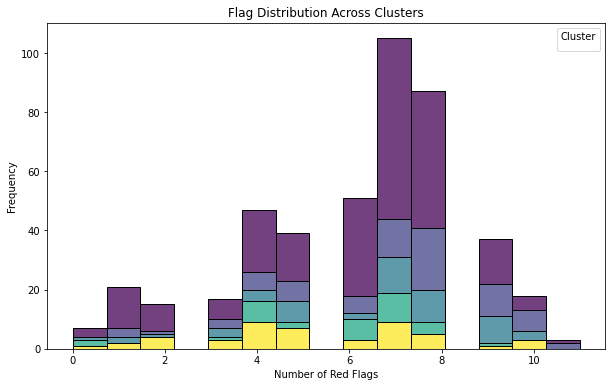

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `concise_df_ordered` is a DataFrame that contains the 'REDFLAGS' and 'Cluster' columns

# Filter the data for the specified clusters 0, 1, 2, 3, and 5
filtered_df = concise_df_ordered[concise_df_ordered['CLUSTER'].isin([0, 1, 2, 3, 5])]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='REDFLAGS', hue='CLUSTER', multiple='stack', palette='viridis', bins=15)

# Add labels and title
plt.title('Flag Distribution Across Clusters')
plt.xlabel('Number of Red Flags')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()


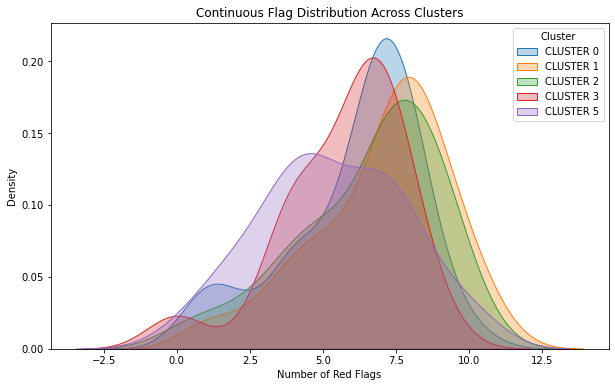

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `concise_df_ordered` is a DataFrame that contains the 'REDFLAGS' and 'CLUSTER' columns

# Filter the data for the specified clusters 0, 1, 2, 3, and 5
filtered_df = concise_df_ordered[concise_df_ordered['CLUSTER'].isin([0, 1, 2, 3, 5])]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot a continuous histogram for each cluster
clusters = [0, 1, 2, 3, 5]
for cluster in clusters:
    sns.kdeplot(
        data=filtered_df[filtered_df['CLUSTER'] == cluster], 
        x='REDFLAGS', 
        label=f'CLUSTER {cluster}', 
        fill=True, 
        alpha=0.3
    )

# Add labels and title
plt.title('Continuous Flag Distribution Across Clusters')
plt.xlabel('Number of Red Flags')
plt.ylabel('Density')
plt.legend(title='Cluster')
plt.show()
